## Libraries Import

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing DataSets

In [6]:
table = pd.read_csv("data.csv")
table.head(5)

game  score  leaderbord  gamers  comp_perc  \
0               A Boy and His Blob    638        2.02    2194       16.5   
1                    A Hat in Time   1992        1.53    7062       35.9   
2              A Hero and a Garden   1364        1.01     503       97.6   
3         A Hero and a Garden (EU)   1363        1.01     581       97.8   
4  A King's Tale: Final Fantasy XV    637        2.02   21914       14.1   

   rating                                                url  min_comp_time  \
0     3.2  https://www.truetrophies.com/game/A-Boy-and-Hi...             15   
1     4.2  https://www.truetrophies.com/game/A-Hat-in-Tim...             15   
2     5.0  https://www.truetrophies.com/game/A-Hero-and-a...              0   
3     2.9  https://www.truetrophies.com/game/A-Hero-and-a...              0   
4     3.3  https://www.truetrophies.com/game/A-Kings-Tale...              4   

   max_comp_time  
0             20  
1             20  
2              1  
3              1  
4              5

## Visualise Data

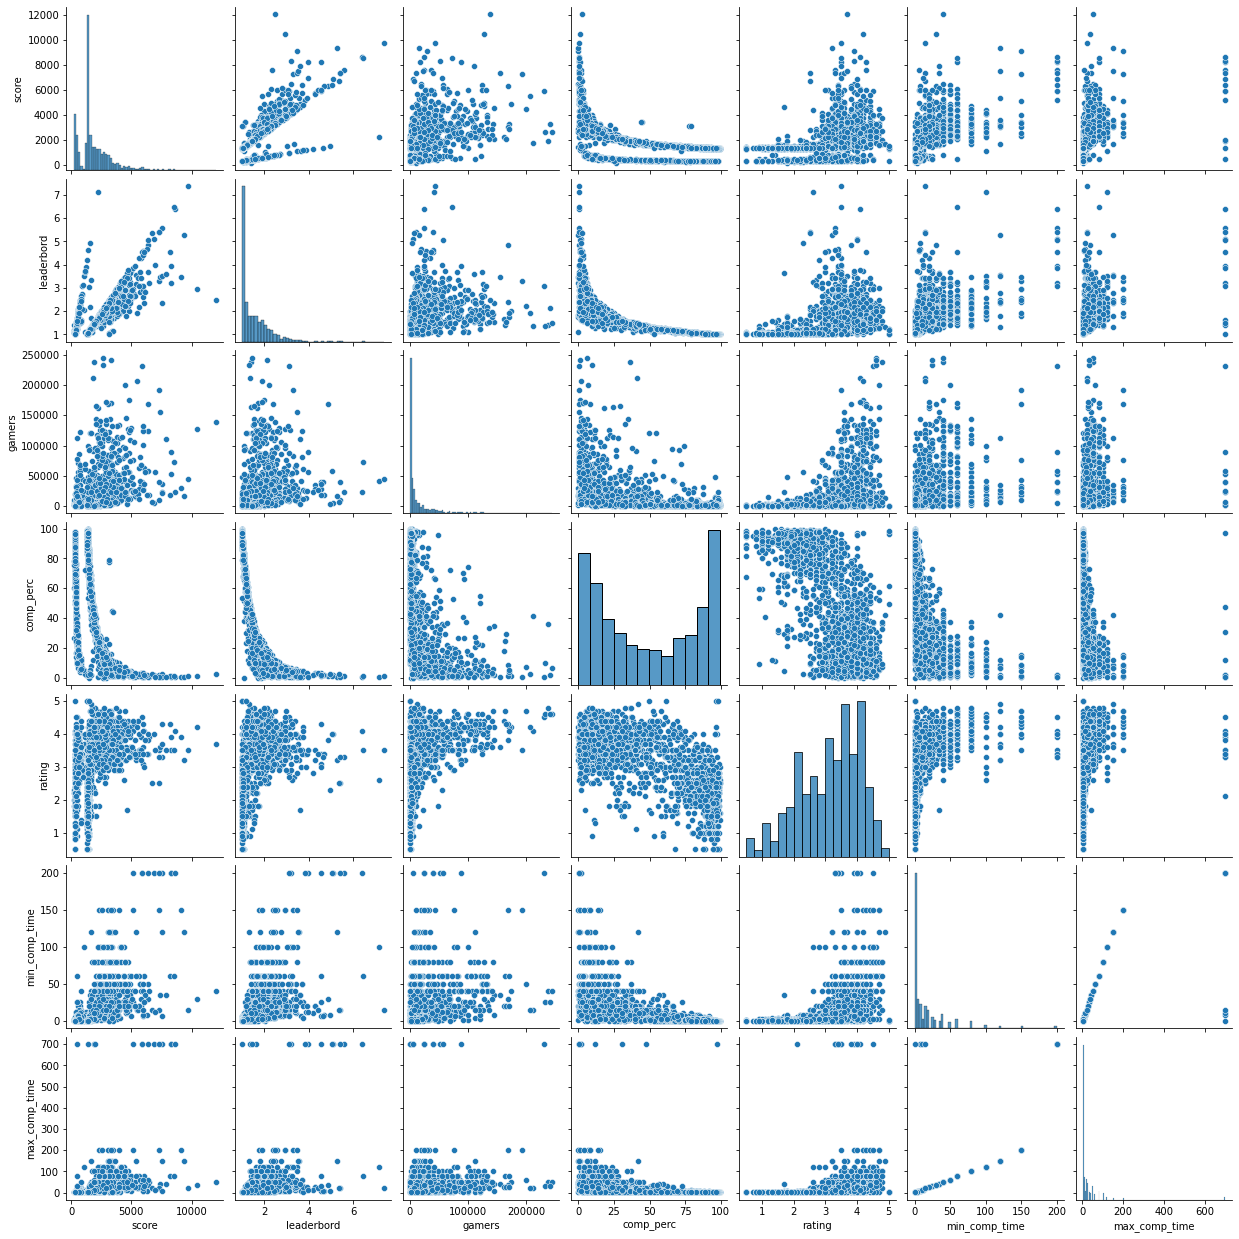

In [8]:
sns.pairplot(table)

In [10]:
X = table.drop(['game','url','rating'],axis=1)
y = table['rating']
y = y.values.reshape(-1,1)
X.shape

(1584, 6)

## Creating Train and Test data

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size = 0.25)


## Building the network

In [14]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

mdl = Sequential()
mdl.add(Dense(30,input_dim = 6,activation='relu'))
mdl.add(Dense(90,activation='relu'))
mdl.add(Dense(60,activation='relu'))

mdl.add(Dense(1,activation='linear'))
mdl.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 90)                2790      
_________________________________________________________________
dense_6 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 61        
Total params: 8,521
Trainable params: 8,521
Non-trainable params: 0
_________________________________________________________________


In [11]:
mdl.compile(optimizer='adam',loss='mean_squared_error')
ephis = mdl.fit(Xtrain,ytrain,epochs=500,batch_size=75,validation_split=0.2)

Epoch 1/500
13/13 [==============================] - 2s 87ms/step - loss: 3741745.1964 - val_loss: 22645.7969
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 241508.5146 - val_loss: 85333.6328
Epoch 3/500
13/13 [==============================] - 0s 7ms/step - loss: 92573.4227 - val_loss: 12397.6152
Epoch 4/500
13/13 [==============================] - 0s 7ms/step - loss: 5664.0515 - val_loss: 2798.0430
Epoch 5/500
13/13 [==============================] - 0s 6ms/step - loss: 1771.6104 - val_loss: 1168.6433
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 758.6058 - val_loss: 89.0505
Epoch 7/500
13/13 [==============================] - 0s 8ms/step - loss: 149.8403 - val_loss: 31.0679
Epoch 8/500
13/13 [==============================] - 0s 7ms/step - loss: 74.6505 - val_loss: 28.8453
Epoch 9/500
13/13 [==============================] - 0s 9ms/step - loss: 43.0226 - val_loss: 94.7923
Epoch 10/500
13/13 [==============================] - 0s 8m

## Evaluating the model

In [13]:
ephis.history.keys()

dict_keys(['loss', 'val_loss'])

In [15]:
plt.plot(ephis.history["loss"])
plt.plot(ephis.history["val_loss"])
plt.title("Model Loss Progress")
plt.ylabel("Training and validation loss")
plt.xlabel("epoch number")
plt.legend(['Training Loss','Validation Loss'])

In [10]:
ypredict = mdl.predict(Xtest)

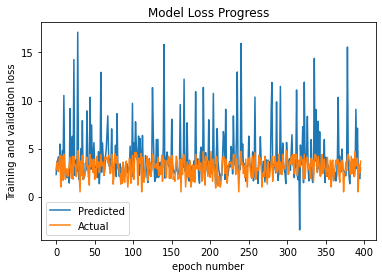

In [11]:
plt.plot(ypredict)
plt.plot(ytest)
plt.title("Model Loss Progress")
plt.ylabel("Training and validation loss")
plt.xlabel("epoch number")
plt.legend(['Predicted','Actual'])

In [12]:
xch = np.array([[1800,2,100000,82,18,34]])
ych = mdl.predict(xch)
